In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [4]:
from rad_functions import *

In [23]:
ns = np.linspace(5,100,15)
mean_beta = np.empty_like(ns)
max_beta = np.empty_like(ns)
min_beta = np.empty_like(ns)

for i,n in enumerate(ns):
    n = int(n)
    print(n)
    betas = beta(p=10,n=n,m1=100,m2=250)
    mean_beta[i] = np.mean(betas)
    max_beta[i] = np.max(betas)
    min_beta[i] = np.percentile(betas,95)

plt.plot(ns,max_beta,ns,th_beta(p=10,n=ns))
plt.axis(xmin=min(ns));



100
93
86
79
72
66
59
52
45
38
32
25
185
11

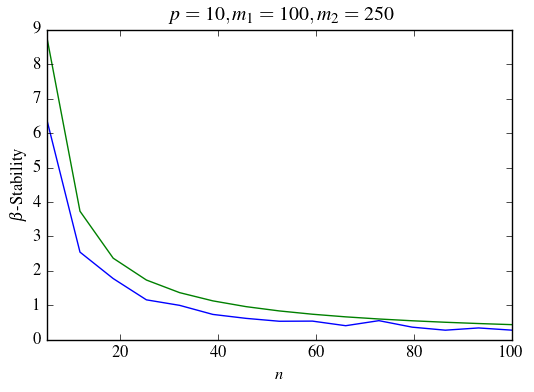

In [36]:
plt.plot(ns,max_beta,ns,th_beta(p=10,n=ns))
plt.axis(xmin=min(ns));
plt.xlabel('$n$')
plt.ylabel('$\\beta$-Stability')
plt.legend(['Experimental','Theoretical'])
plt.title('$p=10,m_1=100,m_2=250$');

In [9]:
def compute(p,n,m):
    M = market(p)

    ins = np.empty(m)
    oos = np.empty(m)

    for i,_ in enumerate(range(m)):
        X,r = sample_market(M,n)
        q = solve(X,r)
        ins[i] = ins_loss(X,r,q)
        # oos[i] = oos_loss(q)

    return ins#-oos
    

In [15]:
ns = np.linspace(50,500,10)
mean_error = np.empty_like(ns)
max_error = np.empty_like(ns)
min_error = np.empty_like(ns)

for i,n in enumerate(ns):
    n = int(n)
    e = compute(p,n,m)
    mean_error[i] = np.mean(e)
    max_error[i] = np.percentile(e,5)
    min_error[i] = np.percentile(e,95)

    

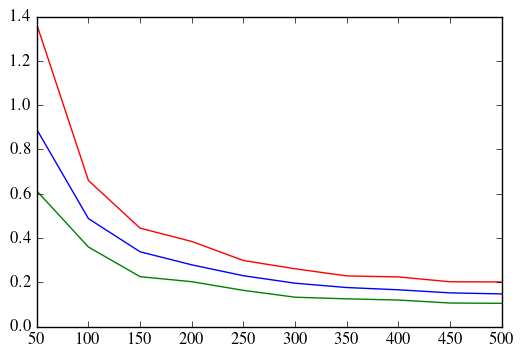

In [16]:
plt.plot(ns,mean_error,ns,max_error,ns,min_error);

In [17]:
ns = np.linspace(50,500,15)
mean_error = np.empty_like(ns)
max_error = np.empty_like(ns)
min_error = np.empty_like(ns)

for i,n in enumerate(ns):
    n = int(n)
    e = compute(p=n,n=n,m=m)
    mean_error[i] = np.mean(e)
    max_error[i] = np.percentile(e,5)
    min_error[i] = np.percentile(e,95)    

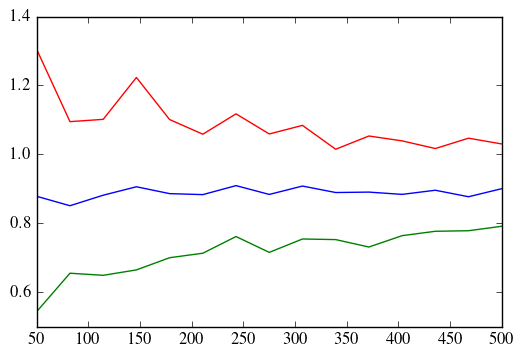

In [18]:
plt.plot(ns,mean_error,ns,max_error,ns,min_error);